In [1]:
import sys
sys.path.append("/home/meribejayson/Desktop/Projects/SharkCNN/training_models/YOLO3D/utils")

import utils
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

from matplotlib.patches import Rectangle

exp_img = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji358/train/images/286.jpg"
exp_label = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji358/train/labels/286.txt"

# exp_img = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji255/test/images/0.jpg"
# exp_label = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji255/test/labels/0.txt"

exp_img = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji358/train/images/1465.jpg"
exp_label = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji358/train/labels/1465.txt"


# exp_img = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji114/train/images/5.jpg"
# exp_label = "/home/meribejayson/Desktop/Projects/SharkCNN/datasets-reduced/dji114/train/labels/5.txt"


In [2]:
x_low_shape = (1, 64, 7, 135, 240)
x_mid_shape = (1, 128, 4, 68, 120)
x_high_shape = (1, 256, 2, 34, 60)

In [3]:
labels = utils.get_coords_from_label_file(exp_label)

In [4]:
def plot_image_with_grid(image_path, grid_shape, highlight_index):
    img = plt.imread(image_path)
    
    # Calculate grid cell size
    nrows, ncols = grid_shape
    dx, dy = img.shape[1] / ncols, img.shape[0] / nrows
    
    # Highlighted cell coordinates
    highlight_x, highlight_y = highlight_index[0] * dx, highlight_index[1] * dy
    
    # Create figure and axes
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    # Highlight the specified grid index
    rect = Rectangle((highlight_x, highlight_y), dx, dy, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

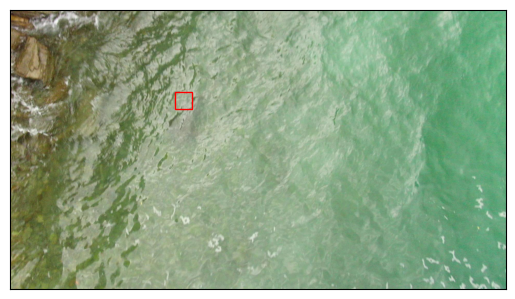

In [5]:
for label in labels:
    idx, intersecting_idxs = utils.get_max_intersecting_iou_grid_loc(label, (1, 5, 17, 30))
    plot_image_with_grid(image_path=exp_img, grid_shape=(1, 5, 17, 30)[2:], highlight_index=idx)

In [6]:
def draw_oriented_bbox(image_path, x, y, w, h, theta):
    # Load the image
    image = cv2.imread(image_path)
    img_height, img_width = image.shape[:2]

    # Calculate the actual coordinates on the image
    center_x = int(x * img_width)
    center_y = int(y * img_height)
    width = int(w * img_width)
    height = int(h * img_height)

    # Calculate the rectangle points before rotation
    rect = ((center_x, center_y), (width, height), theta)

    # Calculate the rotated rectangle
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    # Draw the rotated rectangle
    cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

    # Display the image
    cv2.imshow("Oriented Bounding Box", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
box_output, class_output = utils.get_ground_truth_boxes(exp_label, (1, 5, 17, 30))
for y in range(17):
    for x in range(30):
        if(class_output[0,0,y, x] == 1):
            print([box_output[0, 0, y, x], box_output[0, 1, y, x], box_output[0, 2, y, x], box_output[0, 3, y, x], box_output[0, 4, y, x]])
            draw_oriented_bbox(exp_img, box_output[0, 0, y, x], box_output[0, 1, y, x], box_output[0, 3, y, x], box_output[0, 2, y, x], -box_output[0, 4, y, x])

[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]


/tmp/ipykernel_265462/3338154887.py:17: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.3888889, 0.22222221, 0.09166667, 1.5707964]
[0.3645833, 0.

In [ ]:
def draw_polygon(image_path, points):
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    
    # Scale points from normalized coordinates to actual pixel values
    scaled_points = []
    for point in points:
        x, y = point
        scaled_x = int(x * width)
        scaled_y = int(y * height)
        scaled_points.append([scaled_x, scaled_y])
    
    # Ensure points are in a numpy array of shape (n, 1, 2), where n is the number of points
    pts = np.array(scaled_points, np.int32).reshape((-1, 1, 2))
    
    # Draw the polygon
    cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # Show the image
    cv2.imshow("Polygon", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
points = utils.get_coords_from_label_file(exp_label)

for point in points:
    draw_polygon(exp_img, point)